In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Data exploration
df.head()

,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
0,0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [5]:
#summarizing numerical variables
df.describe()

,asst_id,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.00000,99986.000000,100000.000000
mean,35702.117890,201672.108910,201671.595910,201951.897740,201840.0,0.074090,1.15955,985.886844,0.012430
std,25038.092288,156.139692,158.940598,186.777325,0.0,0.262491,1.56942,862.044503,0.110795
min,0.000000,201001.000000,200547.000000,201006.000000,201840.0,0.000000,0.00000,218.000000,0.000000
25%,12382.750000,201612.000000,201612.000000,201903.000000,201840.0,0.000000,0.00000,536.000000,0.000000
50%,32898.500000,201719.000000,201720.000000,201938.000000,201840.0,0.000000,1.00000,801.000000,0.000000
75%,57701.250000,201808.000000,201809.000000,202045.000000,201840.0,0.000000,2.00000,1018.000000,0.000000
max,82441.000000,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.00000,8922.000000,1.000000


In [6]:
#checking number of columns and number of observations for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
asst_id                100000 non-null int64
product_type           99980 non-null object
mnfture_wk             100000 non-null int64
contract_st            100000 non-null int64
contract_end           100000 non-null int64
contact_wk             100000 non-null int64
contact_type           99986 non-null object
issue_type             85958 non-null object
topic_category         66916 non-null object
parts_sent             54566 non-null object
repair_type            100000 non-null object
repeat_ct              100000 non-null int64
parts_ct               100000 non-null int64
agent_tenure_indays    99986 non-null float64
contact_manager_flg    100000 non-null int64
diagnostics            100000 non-null object
repeat_parts_sent      13346 non-null object
region                 99997 non-null object
country                89998 non-null object
dtypes: float64(1), int64(8), ob

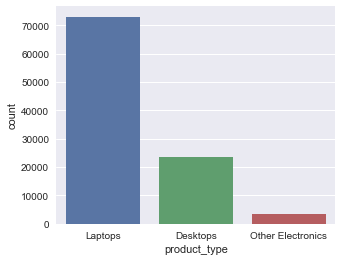

In [7]:
#plotting a histogram for the class of product that describes the asset
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(x='product_type', data=df)

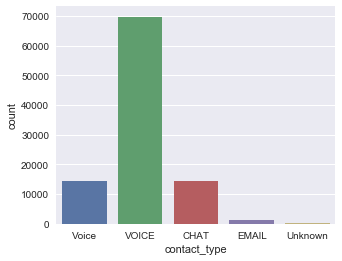

In [8]:
#plotting a histogram for how the customer contacted Dell
sns.countplot(x='contact_type', data=df)
#Note that contact_type is coded as both Voice and VOICE. These two labels would need to be merged into one in the data transformation phase.

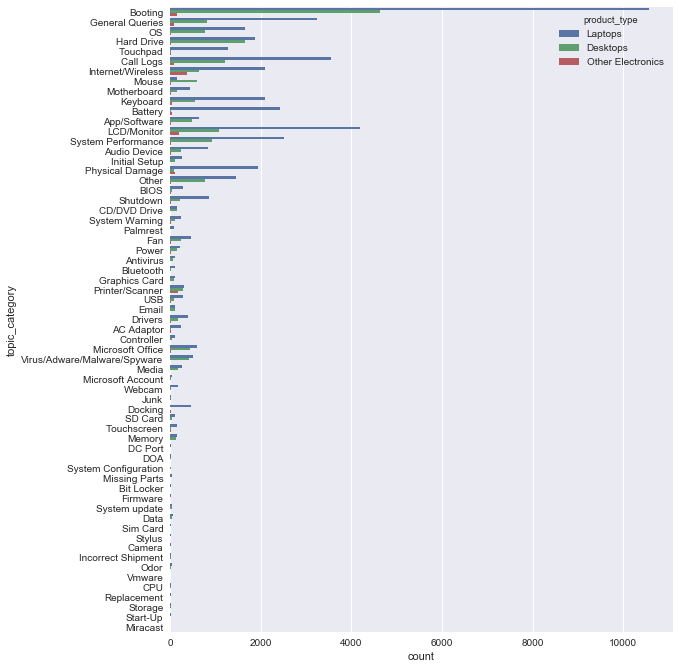

In [9]:
#exploring the topic category for repair by product type
sns.set(rc={'figure.figsize':(9,11.5)})
sns.countplot(y='topic_category', hue='product_type', data=df)

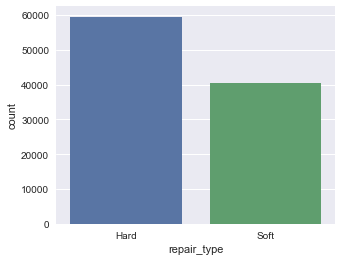

In [10]:
#exploring the type of repair that was provided
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(x='repair_type', data=df)

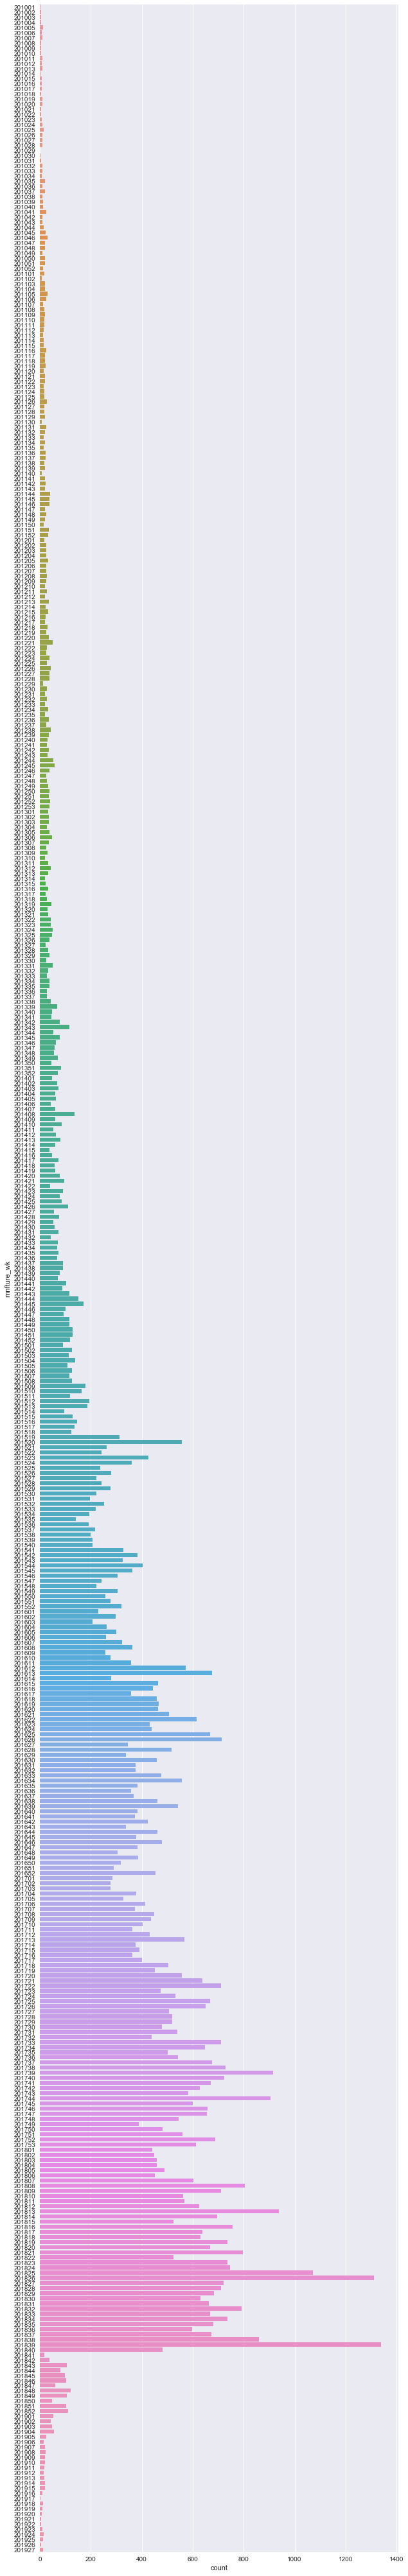

In [11]:
#exploring whether the number of repairs provided vary by the week when the product was manufactured
sns.set(rc={'figure.figsize':(10,73)})
sns.countplot(y='mnfture_wk', data=df)

In [12]:
#checking the number of unique values for each variable
df.nunique()

asst_id                82442
product_type               3
mnfture_wk               497
contract_st              529
contract_end             724
contact_wk                 1
contact_type               5
issue_type                82
topic_category            63
parts_sent              2941
repair_type                2
repeat_ct                  4
parts_ct                  28
agent_tenure_indays     1044
contact_manager_flg        2
diagnostics                4
repeat_parts_sent       1561
region                     3
country                   53
dtype: int64

In [13]:
#checking the number of missing values for each variable
df.isnull().sum()


asst_id                    0
product_type              20
mnfture_wk                 0
contract_st                0
contract_end               0
contact_wk                 0
contact_type              14
issue_type             14042
topic_category         33084
parts_sent             45434
repair_type                0
repeat_ct                  0
parts_ct                   0
agent_tenure_indays       14
contact_manager_flg        0
diagnostics                0
repeat_parts_sent      86654
region                     3
country                10002
dtype: int64

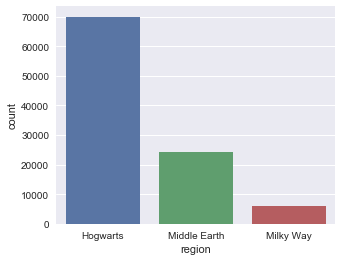

In [14]:
#exploring the number of repairs by the region where the asset is located
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(x='region', data=df)

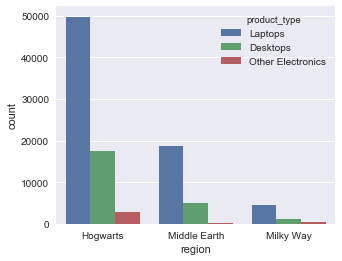

In [15]:
#exploring product type by region
sns.countplot(x='region', hue='product_type', data=df)

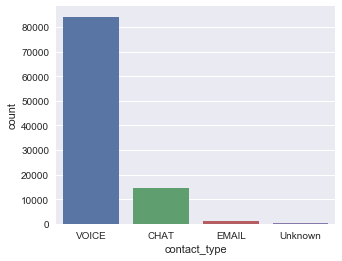

In [16]:
###Data cleaning & transformation
#combining data labels "Voice" and "VOICE" in the contact_type variable
df2 = df.replace("Voice", "VOICE")
sns.countplot(x='contact_type', data=df2)

In [17]:
#finding median of all numerical variables
df2.median(axis=0)

asst_id                 32898.5
mnfture_wk             201719.0
contract_st            201720.0
contract_end           201938.0
contact_wk             201840.0
repeat_ct                   0.0
parts_ct                    1.0
agent_tenure_indays       801.0
contact_manager_flg         0.0
dtype: float64

In [18]:
#finding mean of all numerical variables
df2.mean(axis=0)

asst_id                 35702.117890
mnfture_wk             201672.108910
contract_st            201671.595910
contract_end           201951.897740
contact_wk             201840.000000
repeat_ct                   0.074090
parts_ct                    1.159550
agent_tenure_indays       985.886844
contact_manager_flg         0.012430
dtype: float64

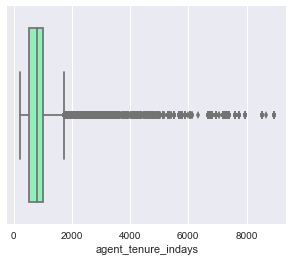

In [19]:
##Imputing missing values in agent_tenure_indays
#checking for outliers in variable agent_tenure_indays
sns.boxplot(x='agent_tenure_indays', data=df2, palette='rainbow', orient='h')

In [20]:
#imputing missing values in variable agent_tenure_indays with median values
df2['agent_tenure_indays'] = df2['agent_tenure_indays'].fillna(df2['agent_tenure_indays'].median())

In [21]:
#checking to see if any missing values remain in variable agent_tenure_indays
df2.isnull().sum()
#no missing values remain

asst_id                    0
product_type              20
mnfture_wk                 0
contract_st                0
contract_end               0
contact_wk                 0
contact_type              14
issue_type             14042
topic_category         33084
parts_sent             45434
repair_type                0
repeat_ct                  0
parts_ct                   0
agent_tenure_indays        0
contact_manager_flg        0
diagnostics                0
repeat_parts_sent      86654
region                     3
country                10002
dtype: int64

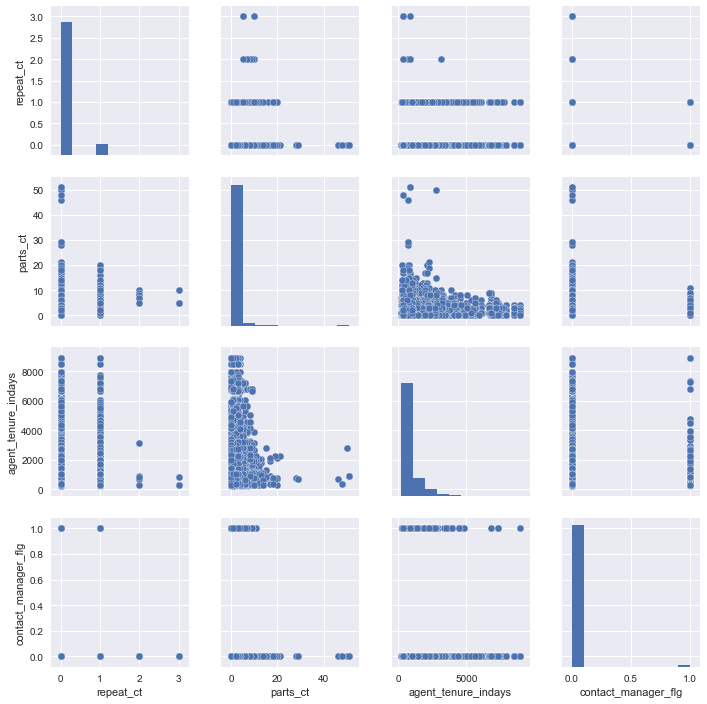

In [22]:
#Exploring relationships between repeat_ct, parts_ct, agent_tenure_indays, and contact_manager_flg using pairplot.
sns.pairplot(data=df2[['repeat_ct', 'parts_ct', 'agent_tenure_indays', 'contact_manager_flg']])

In [23]:
###Linear Regression 1
#Using linear regression to see if the number of parts sent to fix the problem is a function of agent tenure and involvement of manager
#setting variable y equal to parts_ct (parts sent to fix the problem)
y = df2['parts_ct']


In [24]:
#setting variable X equal to agent tenure and involvement of manager
X = df2[['agent_tenure_indays', 'contact_manager_flg']]

In [25]:
#Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
#training the model
#Importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [27]:
#Creating an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [28]:
#training/fitting lm on training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#printing out the coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  3.26868280e-05   5.30360875e-01]


In [30]:
#printing out the R-squared or the coefficient of determination of the model
r_sq = lm.score(X_train, y_train)
print('coefficient of determination:', r_sq)
#coefficient of determination is very low

coefficient of determination: 0.00166959525306


In [31]:
#predicting test data
#using lm.predict to predict off the X_test set of the data
predictions = lm.predict( X_test)

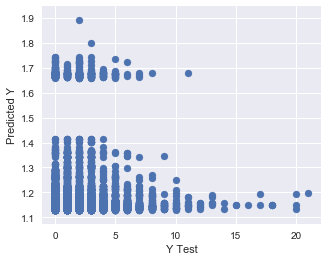

In [32]:
#creating a scatter plot of the real test values versus the predicted values
plt.scatter (y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [33]:
#Evaluating the model
#calculating the mean absolute error, mean squared error, and the root mean squared error.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1250672997
MSE: 2.33322338817
RMSE: 1.52748924323


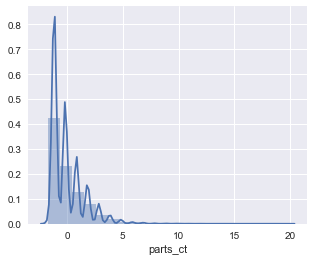

In [34]:
#residuals
#note that in our case the model did not have a good fit. Lets explore the residuals to see how they vary across out y variable
sns.distplot((y_test-predictions),bins=20)
#residuals do not look normally distributed

In [35]:
#creating a dataframe for the coefficiants in our regression model
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
agent_tenure_indays,0.000033
contact_manager_flg,0.530361


In [36]:
### Linear Regression 2
## Using linear regression to see if the number of additional visits required to fix a problem (repeat_ct) is a function of agent tenure and involvement of manager
# regressing repeat_ct on agent_tenure_indays & contact_manager_flg

# setting variable y equal to repeat_ct 
y2 = df2['repeat_ct']
# #setting variable X equal to agent tenure and involvement of manager
X = df2[['agent_tenure_indays', 'contact_manager_flg']]
#Using train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=101
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=101)

In [37]:
#Creating an instance of a LinearRegression() model named lm2
lm2 = LinearRegression()

In [38]:
##training/fitting lm on training data
lm2.fit(X_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#printing out the r-squared
r_sq = lm2.score(X_train, y2_train)
print('coefficient of determination:', r_sq)
#r-squared is very low, meaning very little variation in the dependent variable is explained by the independent variables

coefficient of determination: 0.00110461531962


In [40]:
#printing out the coefficients of the regression
print('Coefficients: \n', lm2.coef_)

Coefficients: 
 [  4.02304174e-06   7.25460830e-02]


In [41]:
#predicting test data
#using lm2.predict to predict off the X_test set of the data
predictions2 = lm2.predict( X_test)

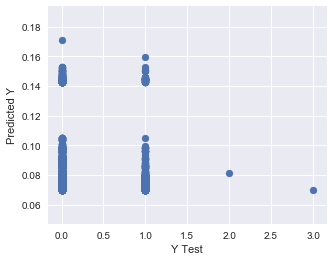

In [42]:
#creating a scatter plot of the real test values versus the predicted values
plt.scatter (y2_test, predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
#Evaluating the model
#calculating the mean absolute error, mean squared error, and the root mean squared error.
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.137330041117
MSE: 0.0692263504524
RMSE: 0.263109008687


In [44]:
#creating a dataframe for the coefficiants in our regression model
coeffecients = pd.DataFrame(lm2.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
agent_tenure_indays,0.000004
contact_manager_flg,0.072546


In [45]:
### Logistic Regession 2
#seeing if contact_manager_flg is a function of parts_ct, repeat_ct and agent_tenure_indays

#exploring value counts within contact_manager_flg variable
df2['contact_manager_flg'].value_counts()

0    98757
1     1243
Name: contact_manager_flg, dtype: int64

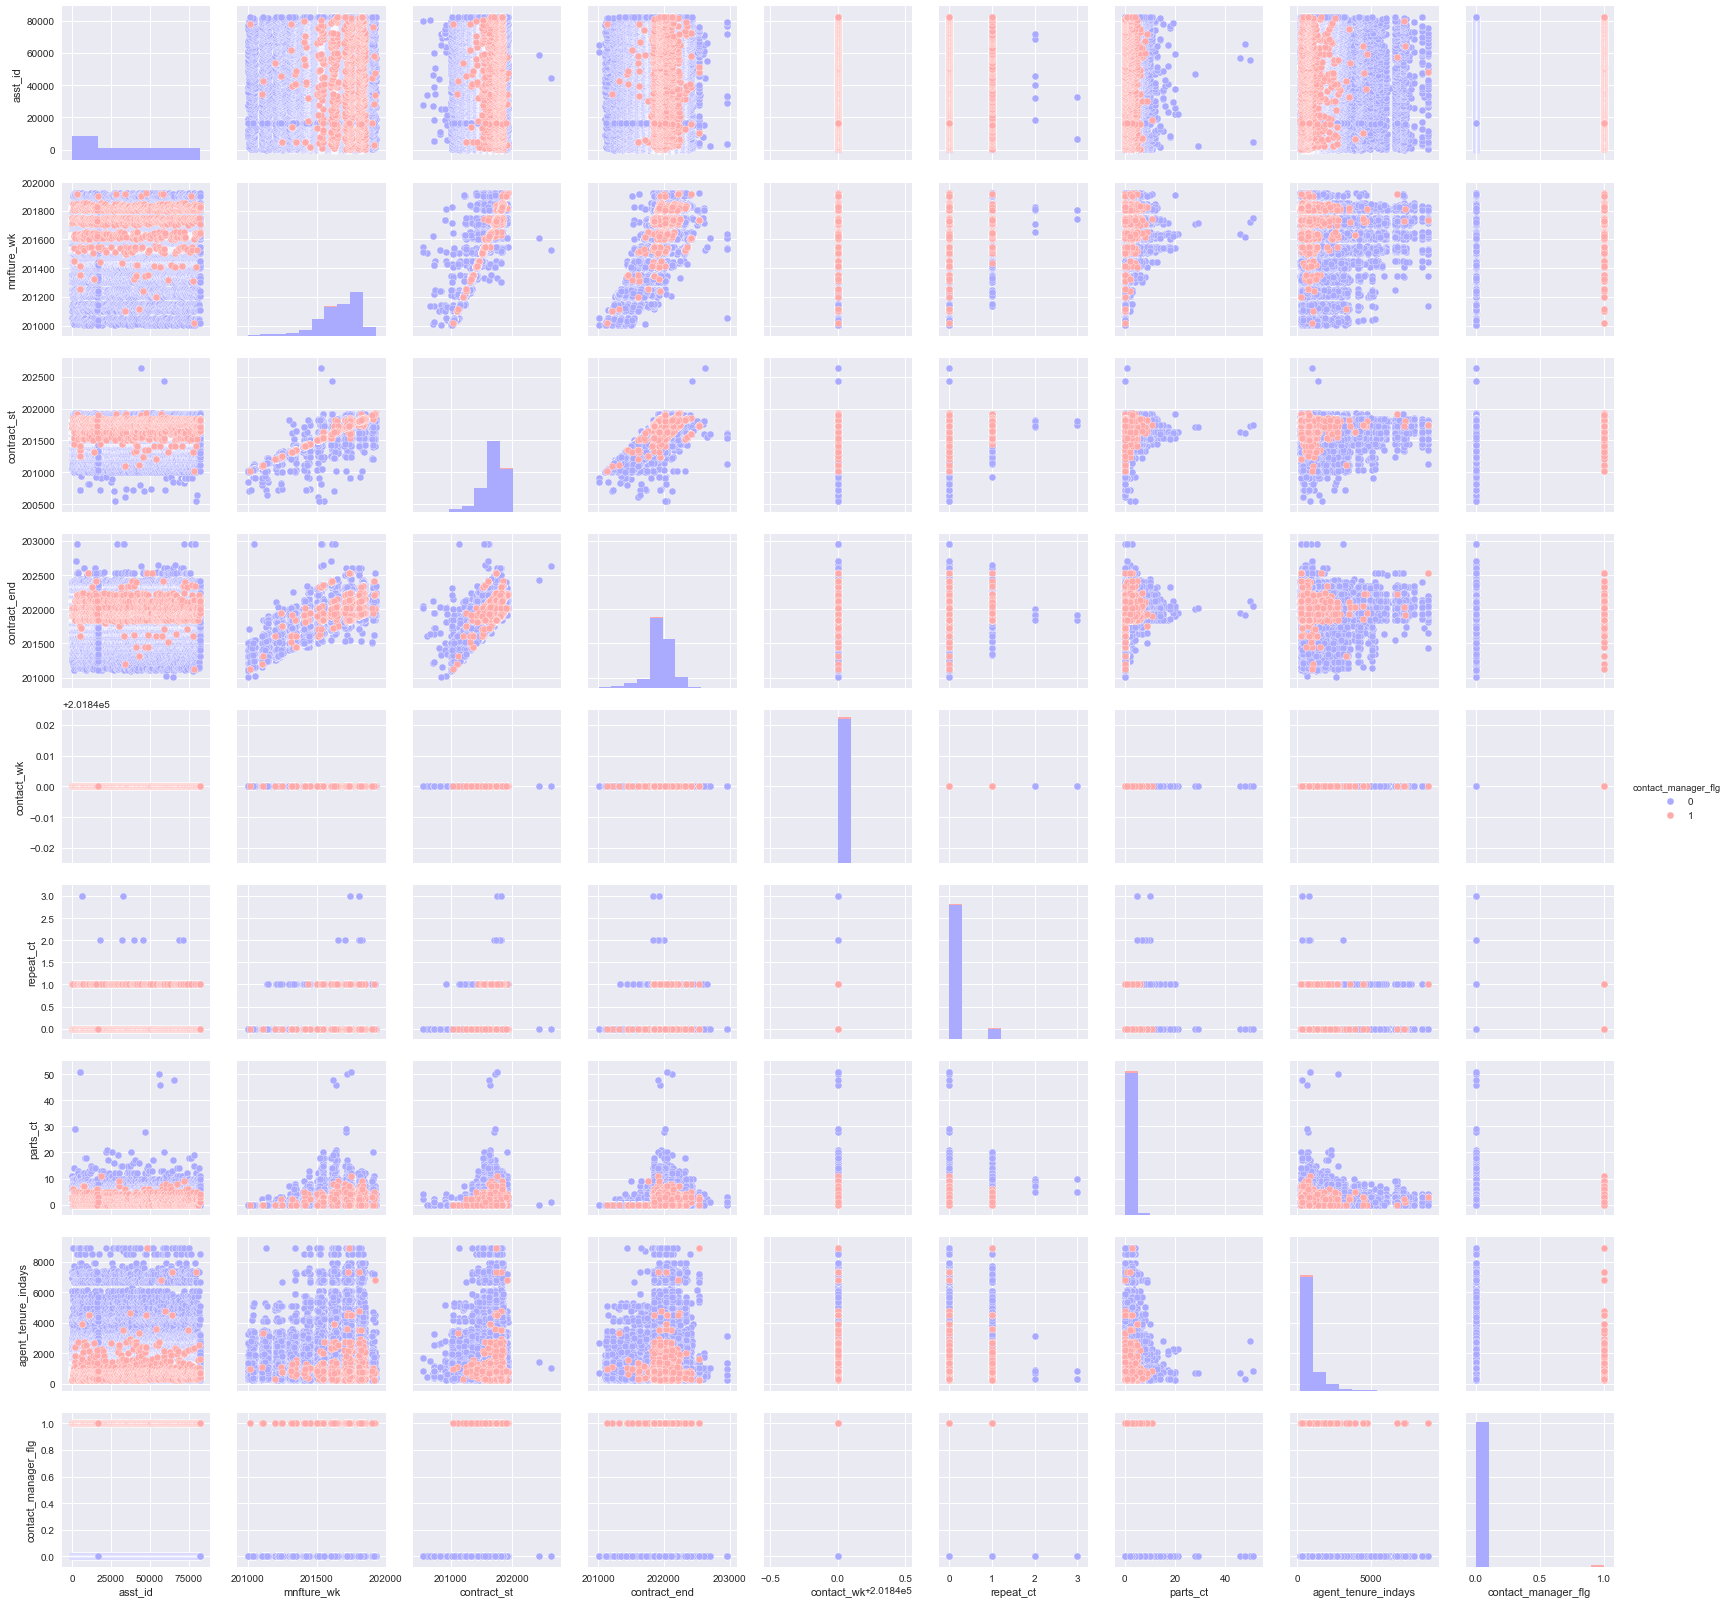

In [46]:
#creating a pairplot with hue defined by whether a manager was contacted to solve the problem
sns.pairplot(df2, hue='contact_manager_flg', palette='bwr')

In [47]:
#defining x and y variables for our logistic regression model
X2 = df2[['parts_ct', 'repeat_ct', 'agent_tenure_indays']]
y2 = df2[['contact_manager_flg']]

In [48]:
#splitting the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
#training and fitting the logistic regression model on the training set
logmodel = LogisticRegression()
logmodel.fit(X2_train,y2_train)

C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
#predicting values for the testing set
predictions3 = logmodel.predict(X2_test)

In [52]:
#creating a classification report of the model
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y2_test,predictions3))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     32586
          1       0.00      0.00      0.00       414

avg / total       0.98      0.99      0.98     33000



C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
#calculating r-squared or the coefficient of determination of the model
r_sq2 = logmodel.score(X2_train, y2_train)
print('coefficient of determination:', r_sq2)

coefficient of determination: 0.987552238806


In [55]:
#printing the accuracy of logistic regression model classifier
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X2_test, y2_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [56]:
###Support Vector Machine Classifier 1

#Importing svc from sklearn
from sklearn.svm import SVC
model=SVC()

In [57]:
#fitting the svc model on training data
model.fit(X2_train,y2_train)

C:\Users\sxf150130\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
#prediction and evaluation
predictions4 = model.predict(X2_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
#printing confusion matrix
print(confusion_matrix(y2_test, predictions4))

[[32584     2]
 [  413     1]]


In [60]:
#printing classification report
print(classification_report(y2_test,predictions4))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     32586
          1       0.33      0.00      0.00       414

avg / total       0.98      0.99      0.98     33000



In [61]:
#the svc model does a better job at predicting values in class 1 of the dependent variable compared to the logistic regression model. 

#calculating r-squared or the coefficient of determination of the svc model
r_sq3 = model.score(X2_train, y2_train)
print('coefficient of determination:', r_sq3)

#svc model has a higher r-squared value compared to the logistic regression model

coefficient of determination: 0.987820895522
